In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

--2023-06-21 07:51:16--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-06-21 07:51:16 (4.50 MB/s) - ‘insurance.csv’ saved [50264/50264]



In [ ]:
pd.DataFrame(dataset)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.sparse import csr_matrix
from sklearn.linear_model import Lasso
from scipy import sparse
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt



In [ ]:
imputer = SimpleImputer(strategy="median")
dataset_num = dataset.drop('region', axis=1).drop('sex', axis=1).drop('smoker', axis=1)
imputer.fit(dataset_num)

In [ ]:
dataset_cat_region = dataset[['region']] # dataset_cat_region is now a pandas.core.frame.DataFrame not pandas.core.series.Series
# dataset_cat_2d = dataset_cat_region.values.reshape(-1, 1) # converts pandas.core.series.Series to 2d array
cat_encoder = OneHotEncoder()
dataset_cat_region_1hot = cat_encoder.fit_transform(dataset_cat_region)
dataset_cat_region_1hot = dataset_cat_region_1hot.toarray()

In [ ]:
dataset_cat_sex = dataset[['sex']]
dataset_cat_smoker = dataset[['smoker']]

ordinal_encoder = OrdinalEncoder()
dataset_cat_sex_encoded = ordinal_encoder.fit_transform(dataset_cat_sex)
dataset_cat_smoker_encoded = ordinal_encoder.fit_transform(dataset_cat_smoker)


In [ ]:
X = pd.concat([dataset[['age', 'bmi', 'children']],
               pd.DataFrame(dataset_cat_region_1hot),
               pd.DataFrame(dataset_cat_sex_encoded),
               pd.DataFrame(dataset_cat_smoker_encoded)], axis=1)

y = dataset['expenses']


In [ ]:
X_train, test_dataset, y_train, test_labels = train_test_split(X , y, test_size=0.2, random_state=42)


# feature engineering - PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(test_dataset)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

Testing set Mean Abs Error: 2729.98 expenses
Congratulations! You passed the challenge.


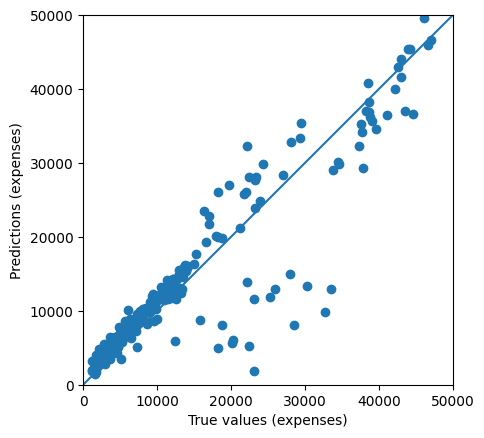

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(test_labels, y_pred)

print("Testing set Mean Abs Error: {:.2f} expenses".format(mae))

if mae < 3500:
    print("Congratulations! You passed the challenge.")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X_test_poly).flatten()

# Plot predictions.
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Testing set Mean Abs Error: 2729.98 expenses
Congratulations! You passed the challenge.


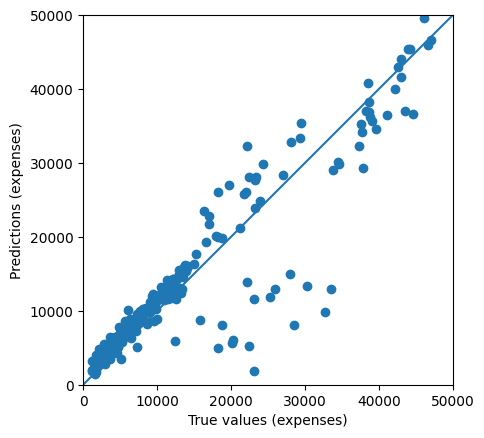

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


# Load the dataset
dataset = pd.read_csv('insurance.csv')

# Separate the features and target variable
X = dataset[['age', 'bmi', 'children', 'region', 'sex', 'smoker']]
y = dataset['expenses']

# One-hot encode the categorical features
X_columns = X[['region', 'sex', 'smoker']]

# OneHotEncoder for all three 'region', 'sex', 'smoker'
onehot_encoder = OneHotEncoder(sparse_output=False)
X_columns_encoded = onehot_encoder.fit_transform(X_columns)
X_encoded = pd.DataFrame(X_columns_encoded)
X_encoded.columns = onehot_encoder.get_feature_names_out(['region', 'sex', 'smoker'])

# Concatenate the encoded features with the numerical features
X = pd.concat([X[['age', 'bmi', 'children']], X_encoded], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature engineering - PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Perform feature selection - Lasso regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)
selected_features = SelectFromModel(lasso, prefit=True)
X_train_selected = selected_features.transform(X_train_poly)
X_test_selected = selected_features.transform(X_test_poly)


# if prefit=False

# # Create a Lasso regression model
# lasso = Lasso(alpha=0.1)
# # Create the SelectFromModel transformer with prefit=False
# selected_features = SelectFromModel(lasso, prefit=False)
# Fit and transform the training data
# X_train_selected = selected_features.fit_transform(X_train_poly, y_train)
# # Transform the test data
# X_test_selected = selected_features.transform(X_test_poly)


# Train the linear regression model
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model.predict(X_test_selected)
mae = mean_absolute_error(y_test, y_pred)

print("Testing set Mean Abs Error: {:.2f} expenses".format(mae))

if mae < 3500:
    print("Congratulations! You passed the challenge.")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")


# Plot predictions.
test_predictions = model.predict(X_test_selected).flatten()

# Plot predictions.
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
X_encoded = pd.DataFrame(X_columns_encoded)
X_encoded
X_encoded.columns = onehot_encoder.get_feature_names_out(['region', 'sex', 'smoker'])
X_encoded

,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1334,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)


AttributeError: ignored